# Proyek Analisis Data: Nama dataset
- Nama: M Ramadani Akbar Ariyadi
- Email: ariyadiakbar71@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Apakah terdapat tren peningkatan atau penurunan dalam jumlah penyewaan sepeda selama beberapa Season terakhir?
- pertanyaan 2: Bagaimana distribusi penyewaan berdasarkan hari dalam seminggu?
- Pertanyaan 3: Apakah ada lonjakan pada jam tertentu untuk penggunaan sepeda

## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gathering Data

In [6]:
import shutil
shutil.copy("/content/drive/MyDrive/Colab Notebooks/KELAS ANALISA DICODING/submision/Bike-sharing-dataset.zip",'./')

'./Bike-sharing-dataset.zip'

In [7]:
import zipfile

# Unzip the archive
local_zip = '/content/Bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [8]:
bike_df = pd.read_csv("/content/hour.csv")

In [ ]:
# bike_df.set_index("dteday", inplace = True)
# bike_df['dteday'] = bike_df.index

In [12]:
bike_df

,instant,dteday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [13]:
bike_df.rename(columns={'yr': 'year',
                        'mnth': 'month',
                        'hr': 'hour',
                        'cnt': 'count'}, inplace=True)

### Assessing Data

In [19]:
# List of columns to convert to categorical
categorical_columns = ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weathersit']

# Convert the specified columns to categorical
bike_df[categorical_columns] = bike_df[categorical_columns].astype('category')

# Displaying the first few rows of the updated dataframe

bike_df.dteday = pd.to_datetime(bike_df.dteday)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [24]:
bike_df.describe(include = "all")

<ipython-input-24-15557d689f80>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_df.describe(include = "all")


,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3.0,1.0,5.0,17.0,0.0,6.0,1.0,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [25]:
#  chekc data apakaha ada yang kosong
bike_df.isna().sum()

instant       0
dteday        0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [26]:
bike_df.duplicated().sum()

0

### Cleaning Data

In [27]:
# karena berdasarkan dari describe data dari data tidak kotor jadi saya tidak cleaning
bike_df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

### Explore ...

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

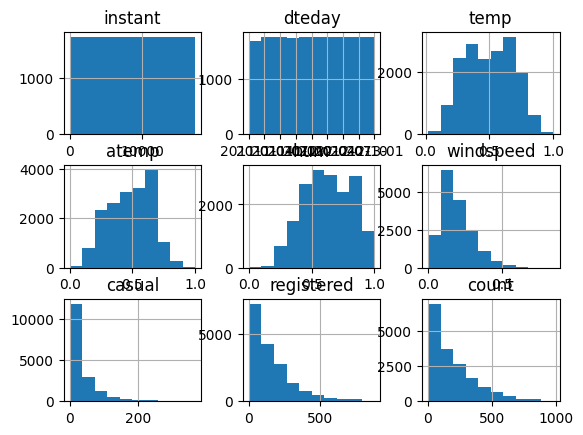

In [28]:
bike_df.hist()

In [29]:
bike_df.corr()

<ipython-input-29-ec47957aa79f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bike_df.corr()


,instant,temp,atemp,hum,windspeed,casual,registered,count
instant,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
count,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [32]:
hour_bike_df =bike_df.groupby(by='hour').agg({
    'count': 'sum',
    'registered': "sum",
    'casual': "sum",
})

In [33]:
weekday_bike_df =bike_df.groupby(by='weekday').agg({
    'count': 'sum',
    'registered': "sum",
    'casual': "sum",
})

In [34]:
season_bike_df =bike_df.groupby(by='season').agg({
    'count': 'sum',
    'registered': "sum",
    'casual': "sum",
})

In [36]:
year_bike_df =bike_df.groupby(by='year').agg({
    'count': 'sum',
    'registered': "sum",
    'casual': "sum",
})

## Visualization & Explanatory Analysis

### pertanyaan 1: Apakah terdapat tren peningkatan atau penurunan beberapa season ?

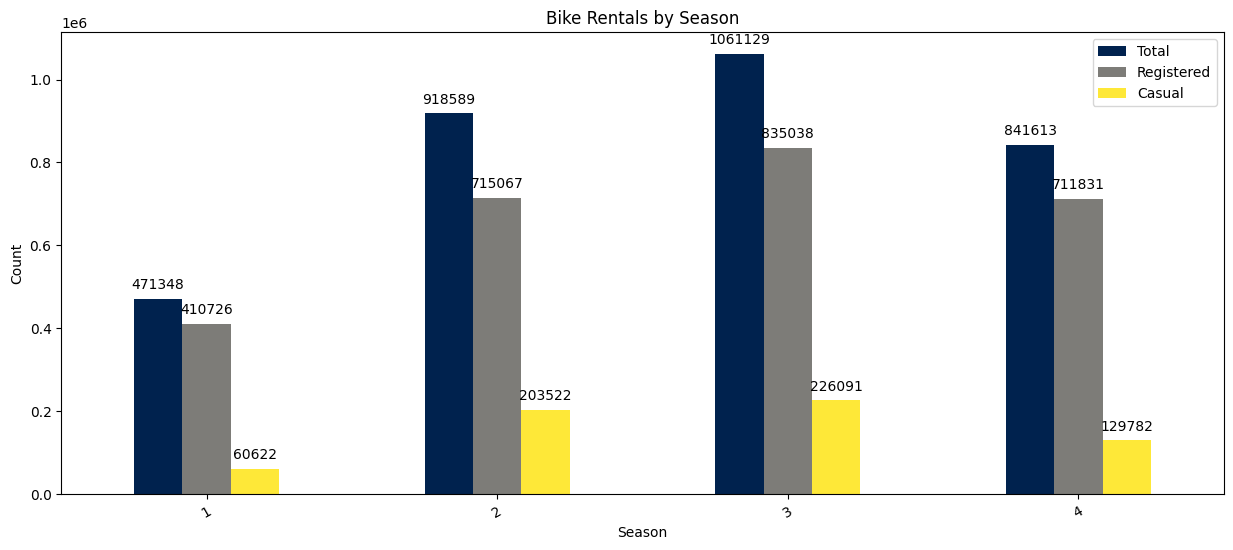

In [38]:
import matplotlib.pyplot as plt

# Assuming your grouped DataFrame is stored in a variable called 'season_bike_df'
ax = season_bike_df.plot(kind='bar', y=['count', 'registered', 'casual'], colormap='cividis', figsize=(15, 6))
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Count')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.legend(['Total', 'Registered', 'Casual'])
plt.show()

### Pertanyaan 2: Bagaimana distribusi penyewaan berdasarkan hari dalam seminggu?

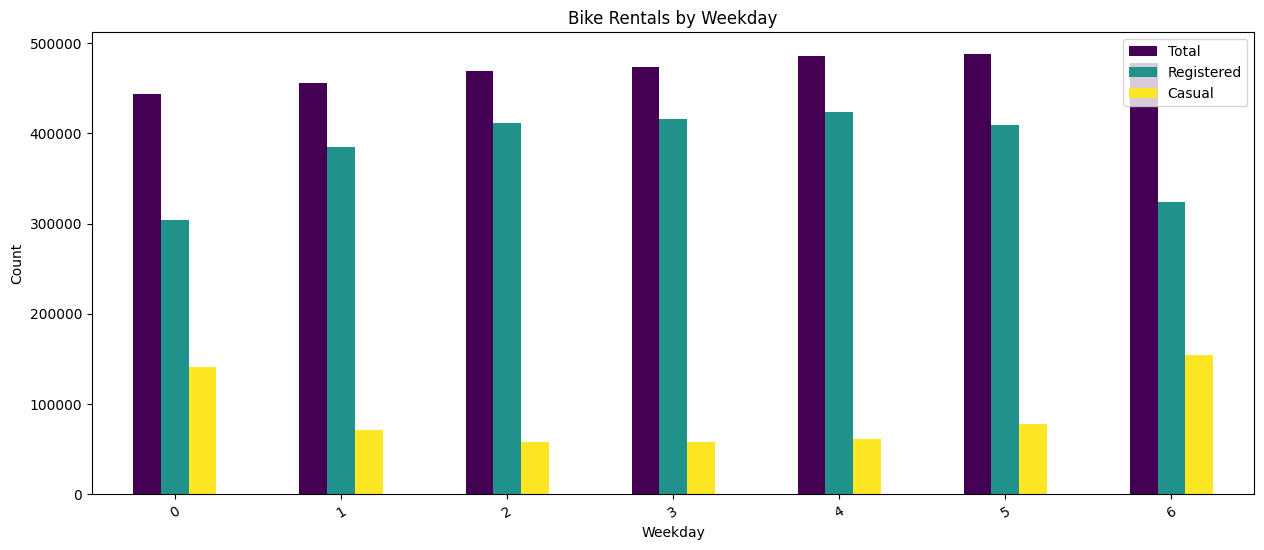

In [39]:
import matplotlib.pyplot as plt

# Assuming your grouped DataFrame is stored in a variable called 'result_df'
weekday_bike_df.plot(kind='bar', y=['count', 'registered', 'casual'], colormap='viridis', figsize=(15, 6))
plt.title('Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.legend(['Total', 'Registered', 'Casual'])
plt.show()

### pertanyaan 3: bagaimana kondisi penyewaan sepeda selama  pada  jam tertentu untuk penggunaan sepeda ?

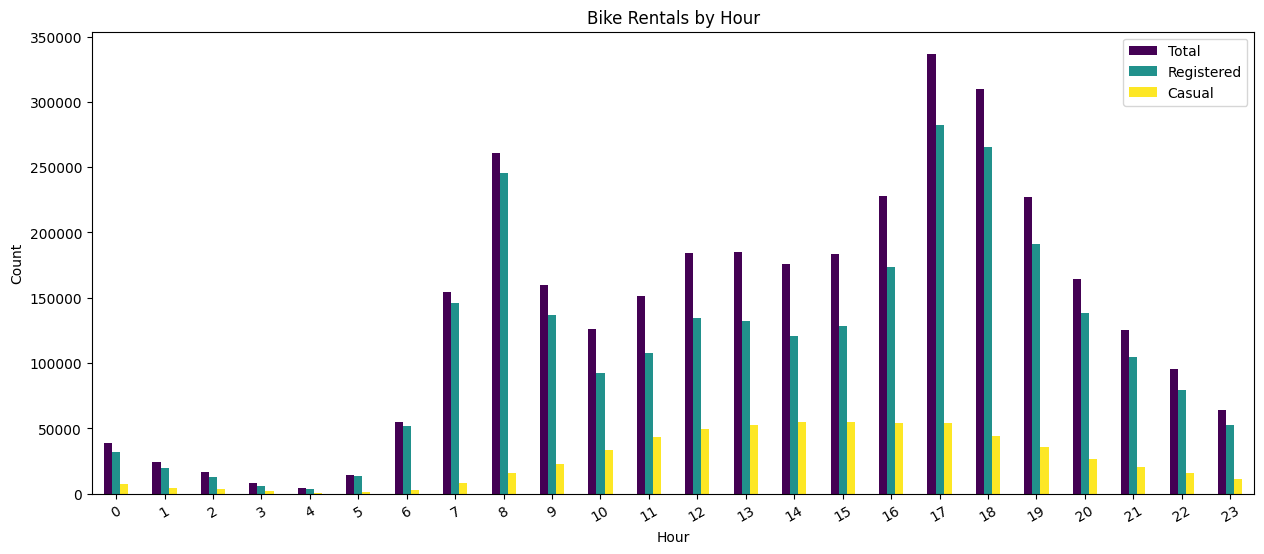

In [40]:
import matplotlib.pyplot as plt

# Assuming your grouped DataFrame is stored in a variable called 'result_df'
hour_bike_df.plot(kind='bar', y=['count', 'registered', 'casual'], colormap='viridis', figsize=(15, 6))
plt.title('Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.legend(['Total', 'Registered', 'Casual'])
plt.show()

## Conclusion

- **Conclusion 1: bagaimana tren peningkatan atau penurunan dalam jumlah penyewaan sepeda selama beberapa season?** pola tren terdapat perbedaan paling tinggi didapat di season ke tiga dan terendah di dapat pada season ke 1
- **Conclusion 2: Bagaimana distribusi penyewaan berdasarkan hari dalam seminggu?** distribusi untuk penyewaan sepeda selama seminggu terakhir hampir sama tidak terlihat perbedaan yang begitu mencolok tetapi lebih dominan di hari libur
- **Conclusion 3: bagaimana pola penggunaan sepeda pada jam tertentu ?** pola penggunaan sepeda paling banyak di dominasi saat awal jam kerja dan pulang kerja terdapat lonjakan pada jam tersebut dan p-enggunaan rendah saat oranga" melakukan istirahat

In [41]:
bike_df.to_csv("data.csv")